## **Objective**: 

This analysis aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

We will be looking at the process for cleaning the data, and visualizing several parameters so we can gain an understanding of the driving factors. We will be documenting all the inferences we can make based on our observations.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 500)

In [2]:
#Reading previous application file
prev=pd.read_csv('../input/home-credit-default-risk/previous_application.csv')

In [3]:
#Reading application_data file 
app=pd.read_csv('../input/home-credit-default-risk/application_train.csv')

## Inspecting the dataframe

In [4]:
app.shape

(307511, 122)

In [5]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [6]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [7]:
#column-wise null count in the application data
100*round(app.isnull().sum()/len(app),4)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [8]:
#retaining only those columns where the null percentage is less than 50
app=app.loc[:,100*round(app.isnull().sum()/len(app),4)<50]

In [9]:
#inspecting
app.shape

(307511, 81)

#### After dropping the columns where more than half the rows contained null values, we are left with 81 columns (we started with 122)

In [10]:
#checking null percentages again 
100*round(app.isnull().sum()/len(app),4)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

### We can now try imputing the missing values for columns where the null percentage is less than 14%

In [11]:
#Checking what these columns are, in which we can safely impute values
cols_to_impute = list(app.loc[:,(100*round(app.isnull().sum()/len(app),4) > 0) & (100*round(app.isnull().sum()/len(app),4) <14)].columns)
cols_to_impute

['AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [12]:
#Checking what these columns look like, and what data they hold
for i in enumerate(cols_to_impute):
    print(i[1],'\n')
    print((app[i[1]].describe()))
    print('\n')

AMT_GOODS_PRICE 

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


NAME_TYPE_SUITE 

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object


EXT_SOURCE_2 

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


OBS_30_CNT_SOCIAL_CIRCLE 

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


DEF_30_CNT_SOCIAL_CIRCLE 

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%   

### We can make some observations here
* Name_Type_Suite is a categorical variable and cannot be imputed using numerical analysis 
* Rest of the columns are numerical in nature, and some appear to have outliers. 

To further study the presence of these outliers, we'll use box plots

In [13]:
#We create another list of columns with only the numerical variables that we wish to impute null values for
num_cols_to_impute=cols_to_impute.copy()
num_cols_to_impute.remove('NAME_TYPE_SUITE')

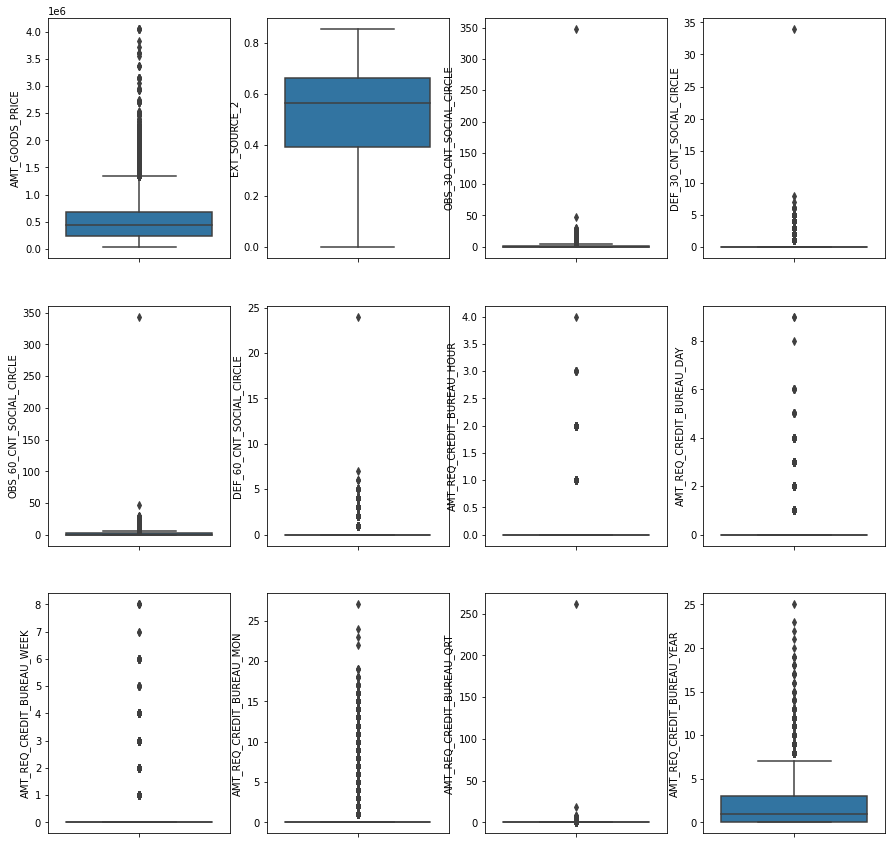

In [14]:
plt.figure(figsize=(15,15))

for i in enumerate(num_cols_to_impute):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(y=i[1],data=app)

plt.show()

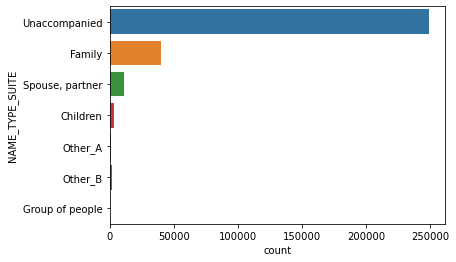

In [15]:
#Let's also visualize the categorical variable and see what the spread is like
sns.countplot(y='NAME_TYPE_SUITE',data=app)
plt.show()

### We can take the following observations from the visual analysis:
* All the discussed numerical variables have a large number of outliers except for EXT_SOURCE_2. We can use the mean for imputing the null values in this column since the spread is even. For the rest, we'll have to use median. Let's take a look at some of these columns: 
    * 'OBS_30_CNT_SOCIAL_CIRCLE' - For this column, we see that the spread is heavily concentrated near the lower end. If we look at the description of the column above, the 50th percentile is at 0, 75th percentile at 2 and the max value is very high, 348. This will lead to a skewed mean, hence we can impute with the median which is 0.
    * Same as above, for the columns 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', we see a similar spread of the data. A very huge volume of the data is at zero, and few outliers span to higher values. We can impute the null values with 0 for these as well. 
    * For the column 'AMT_REQ_CREDIT_BUREAU_YEAR', however, imputing with zero won't be wise. This is because the data is more spread out in this column, and there are many occurences of values greater than zero, as can be seen from the box plot. The median of the values in this column is occuring at 1, and we can use 1 as imputing value while filling the nulls in this column.
* For the one categorical column we looked at (NAME_TYPE_SUITE), the cateogry "Unaccompanied" is a clear winner for the imputation process. 
    * The categorical variable can be imputed using the concept of mode. The mode of the data is the data point with the highest frequency of occurence. We can easily identify from the countplot that "Unaccompanied" has the highest frequency of occurence and can be used for this impuation. 
* For the column 'AMT_GOODS_PRICE' we will need to proceed with caution since this variable would be critical towards the analysis. If we impute a wrong value here, it could lead to heavily skewed results.

In [16]:
#Let's check if any numerical columns have negative values which don't make sense (for example, negative age)
app.min()

SK_ID_CURR                               100002
TARGET                                        0
NAME_CONTRACT_TYPE                   Cash loans
CODE_GENDER                                   F
FLAG_OWN_CAR                                  N
FLAG_OWN_REALTY                               N
CNT_CHILDREN                                  0
AMT_INCOME_TOTAL                          25650
AMT_CREDIT                                45000
AMT_ANNUITY                              1615.5
AMT_GOODS_PRICE                           40500
NAME_INCOME_TYPE                    Businessman
NAME_EDUCATION_TYPE             Academic degree
NAME_FAMILY_STATUS               Civil marriage
NAME_HOUSING_TYPE               Co-op apartment
REGION_POPULATION_RELATIVE              0.00029
DAYS_BIRTH                               -25229
DAYS_EMPLOYED                            -17912
DAYS_REGISTRATION                        -24672
DAYS_ID_PUBLISH                           -7197
FLAG_MOBIL                              

In [17]:
#Inspecting the data types
app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [18]:
#Fixing data types of columns which appear to be incorrectly formatted
app['DAYS_REGISTRATION'] = app['DAYS_REGISTRATION'].astype('int64')
app.CNT_FAM_MEMBERS = pd.to_numeric(app.CNT_FAM_MEMBERS, errors = 'coerce')
app['CNT_FAM_MEMBERS'] = app['CNT_FAM_MEMBERS'].fillna(0).astype('int64')



### Observation:
 
 There are several columns like 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION' which contain a value representing number of days. These cannot be negative and need to be fixed. We can also change the 'DAYS_BIRTH' column to years, as years is a good measure for age of a person, not days. 

In [19]:
app.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [20]:
#Let's see what this looks like with absolute values
app.DAYS_BIRTH.apply(lambda x: abs(x)).describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [21]:
# Converting 'DAYS_BIRTH' to 'AGE'.

app['AGE']=pd.to_timedelta(abs(app['DAYS_BIRTH']), unit = 'days')
app['AGE']= round((app['AGE']/np.timedelta64(1,'Y')))

In [22]:
app['AGE'] = app['AGE'].astype('int64')

In [23]:
#Inspecting again to ensure the calcualtion was correct
app.AGE.describe()

count    307511.000000
mean         43.908761
std          11.955775
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [24]:
#We can drop the original days column for age
app.drop('DAYS_BIRTH',axis=1,inplace=True)

In [25]:
#Now, we'll change the rest of the days columns to positive values.

days_columns = ['DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION']
for i in days_columns:
    app[i]=app[i].apply(lambda x:abs(x))
   

In [26]:
app.AMT_ANNUITY.isna().sum()

12

In [27]:
#Changing AMT_ANNUITY and AMT_CREDIT units to thousand 
#there are some NaNs in AMT_ANNUITY. We will be dropping them
app.dropna(subset=['AMT_ANNUITY'],inplace=True)
app.AMT_ANNUITY = app.AMT_ANNUITY.apply(lambda x:round(x/1000))
app.AMT_CREDIT = app.AMT_CREDIT.apply(lambda x: round(x/1000))

In [28]:
#Changing the units of client's income to thousands

app['AMT_INCOME_TOTAL_original']=app['AMT_INCOME_TOTAL'] #backing up the column if needed in future
app['AMT_INCOME_TOTAL']=app['AMT_INCOME_TOTAL'].apply(lambda x:round(x/1000))

In [29]:
app['AMT_INCOME_TOTAL'].describe()

count    307499.000000
mean        168.787925
std         237.127746
min          26.000000
25%         112.000000
50%         147.000000
75%         202.000000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

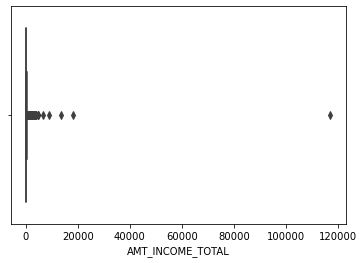

In [30]:
#The box plot can be used to identify the outliers easily in the income column.
sns.boxplot(app.AMT_INCOME_TOTAL)
plt.show()

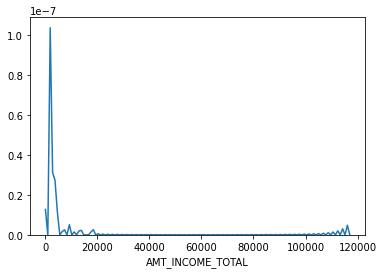

In [31]:
#The income seems to spread towards the lower end, indicating a lot of loan seekers belong to the lower income bracket (Mainly middle class folks)
sns.distplot(app['AMT_INCOME_TOTAL'], hist=False)
plt.show()

In [32]:
#This is the outlier that skews our data to the higher end
app['AMT_INCOME_TOTAL'].max()   

117000

In [33]:
#We can bin the values in the income column to deal with the outliers
# bins = pd.IntervalIndex.from_tuples([(0, 50), (50, 120), (120, 250),(250,500),(500,5000),(5000,120000)])
app['INCOME_CATEGORY']=pd.cut(app['AMT_INCOME_TOTAL'], bins=[0,50,120,250,500,5000,120000], labels = ['Lower','LowerMiddle','UpperMiddle', 'Upper','Rich','UberRich'])

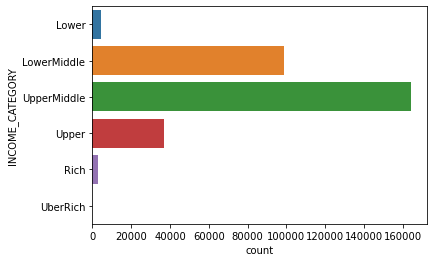

In [34]:
sns.countplot(y=app.INCOME_CATEGORY)

In [35]:
app.INCOME_CATEGORY.value_counts()

UpperMiddle    164380
LowerMiddle     98813
Upper           37062
Lower            4542
Rich             2697
UberRich            5
Name: INCOME_CATEGORY, dtype: int64

### Observations
* We have a lot of crowding of loan application from people in middle class, specifically upper middle class with an income in the range of 120-250 thousand. 
* There's clearly a few **outliers** in this data, we have binned them in the "UberRich" category 

In [36]:
# Binning the age column
app['AGE_CAT']=pd.cut(app['AGE'], bins=[0,30,40,50,60,70], labels = ['0 - 30','30 - 40', '40 - 50','50 - 60','60 +'])

In [37]:
app.AGE_CAT.value_counts()

30 - 40    82862
40 - 50    75460
50 - 60    67982
0 - 30     49041
60 +       32154
Name: AGE_CAT, dtype: int64

In [38]:
#The days employed column has some negative values. We need to fix this
#Also, the days as such would be of little value to us during the analysis. Instead, we can convert this column to years
app.DAYS_EMPLOYED.describe()

count    307499.000000
mean      63817.623992
std      141277.920123
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

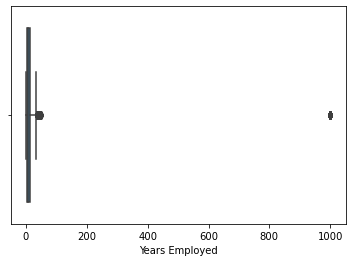

In [39]:
#Let's see the spread of data when viewed as years
ax=sns.boxplot(app['DAYS_EMPLOYED'].apply(lambda x: abs(x)).apply(lambda x:x//365))
ax.set(xlabel='Years Employed')
plt.show()

### Observation
There is definitely something wrong going on here. We see there is an applicant which has an employment experience of around 1000 years! This is definitely an error and we need to drop this value so it doesn't impact the analysis. Let's see what this row is.

In [40]:
#Here, we can abserve that there is not one, but 55374 such rows which are causing outliers in the column. Since this is a lot of rows, we will not delete them. Instead, let's change these to NaN
app.loc[app['DAYS_EMPLOYED'].abs()==365243,'DAYS_EMPLOYED']=np.NaN

In [41]:
#Binning the days employed column into YEARS_EMPLOYED
app['YEARS_EMPLOYED']=pd.cut(app['DAYS_EMPLOYED'].apply(lambda x: abs(x)), bins=[0,365,5*365,10*365,25*365,45*365,1001*365], labels = ['Upto 1 Year','1 - 5 Years','5 - 10 Years', '10 - 25 Years','25 - 45 Years','45+ Years'])
app['YEARS_EMPLOYED'].value_counts()

1 - 5 Years      108326
5 - 10 Years      64866
10 - 25 Years     44639
Upto 1 Year       27979
25 - 45 Years      6289
45+ Years            24
Name: YEARS_EMPLOYED, dtype: int64

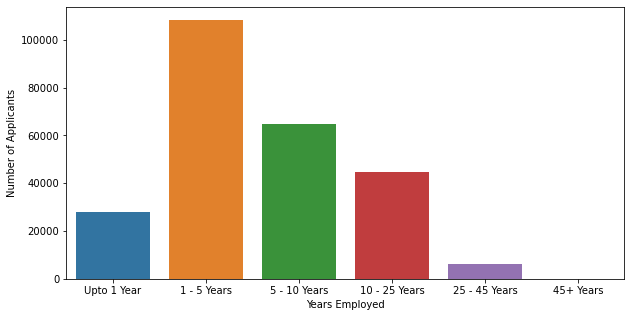

In [42]:
#Let's visualize the results for a better view
plt.figure(figsize=(10,5))
ax = sns.countplot(app['YEARS_EMPLOYED'])
ax.set(xlabel='Years Employed',ylabel='Number of Applicants')
plt.show()

### Observation:
* We can note that the largest number of loan applicants fall in the range of 1-5 years in terms of work experience. There is also a significant chunk of people in the 45+ years experience range who apply for loans
* We have successfully dealt with the outliers in the AMT_INCOME_TOTAL and DAYS_EMPLOYED using the method of binning

In [43]:
#Let's convert the AMT_GOODS_PRICE to thousands as well, for ease of analysis 
app['AMT_GOODS_PRICE']=app['AMT_GOODS_PRICE'].apply(lambda x:(x//1000))

We can easily observe that the value of goods against which a loan is acquired ranges from 40k to 4050k

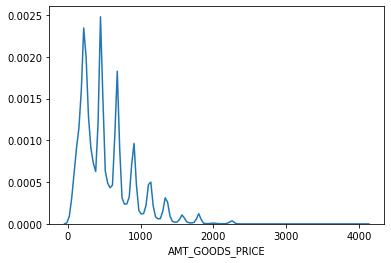

In [44]:
#Let's see what the spread of the goods value looks like
sns.distplot(app.AMT_GOODS_PRICE.dropna(),hist=False)
plt.show()

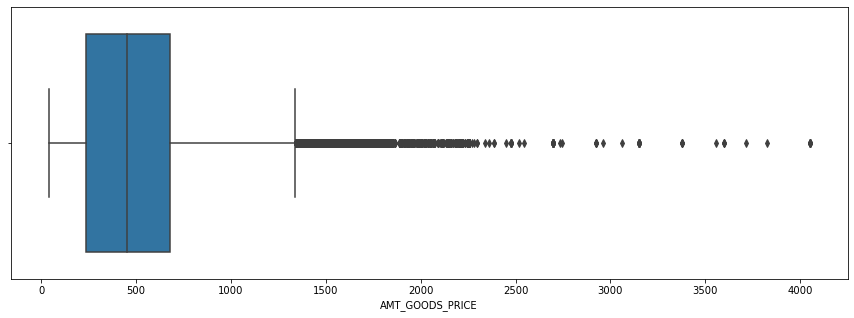

In [45]:
#We can spot some outliers in the goods price column
plt.figure(figsize=(15,5))
sns.boxplot(app['AMT_GOODS_PRICE'])
plt.show()

In [46]:
#Upon inspecting the spread of the data using qcut, we can see that high values may not be outliers after all, since there are quite a few values located in the top 10% range.
pd.qcut(app['AMT_GOODS_PRICE'],q=[0,0.2,0.4,0.6,0.8,0.9,1]).value_counts()

(39.999, 225.0]     71452
(373.0, 522.0]      61523
(522.0, 814.0]      61346
(225.0, 373.0]      51471
(814.0, 1093.0]     30745
(1093.0, 4050.0]    30684
Name: AMT_GOODS_PRICE, dtype: int64

In [47]:
app.AMT_GOODS_PRICE.describe()

count    307221.000000
mean        538.246787
std         369.468792
min          40.000000
25%         238.000000
50%         450.000000
75%         679.000000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64

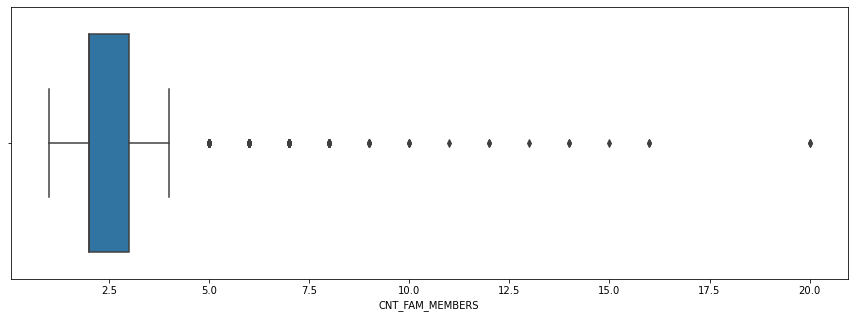

In [48]:
#Let's see how the family member count column looks like. We'll be excluding the zero value here since that was used to fill NANs previously
plt.figure(figsize=(15,5))
sns.boxplot(app.loc[app['CNT_FAM_MEMBERS']>0].CNT_FAM_MEMBERS)
plt.show()

### Observation
There are some **outliers** in the number of family members, these indicate some extraordinarily large families, and may be one-off cases.

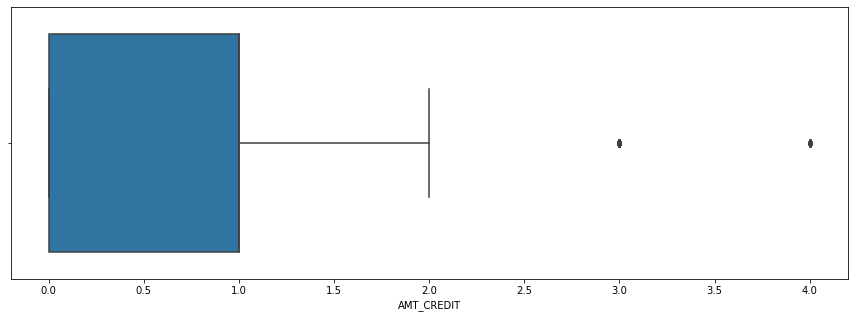

In [49]:
#Let's now see how the credit amount is spread out
plt.figure(figsize=(15,5))
sns.boxplot(app.AMT_CREDIT.apply(lambda x: round(x/1000)))
plt.show()

## Observations
* The **outlier(s)** seem to be in sync with those in the AMT_GOODS_PRICE column
* This makes sense, since a client that purchases high value goods would certainly need a high value loan, hence causing the outliers in the in the credit amount column too

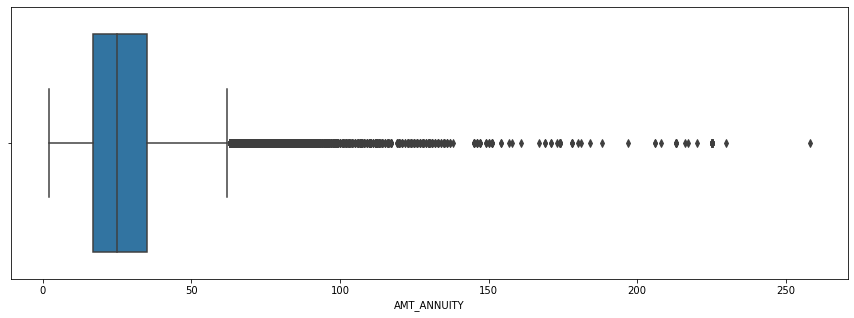

In [50]:
#Observing outliers in the annuity
plt.figure(figsize=(15,5))
sns.boxplot(app.AMT_ANNUITY)
plt.show()

### Observation
We can observe quite few outliers in the annuity column. These would again be due to high value goods purchased by clients, needing high value credit, in turn causing a high annuity amount for the loan.

# STARTING ANALYSIS PART

In [51]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307499 non-null  int64   
 1   TARGET                        307499 non-null  int64   
 2   NAME_CONTRACT_TYPE            307499 non-null  object  
 3   CODE_GENDER                   307499 non-null  object  
 4   FLAG_OWN_CAR                  307499 non-null  object  
 5   FLAG_OWN_REALTY               307499 non-null  object  
 6   CNT_CHILDREN                  307499 non-null  int64   
 7   AMT_INCOME_TOTAL              307499 non-null  int64   
 8   AMT_CREDIT                    307499 non-null  int64   
 9   AMT_ANNUITY                   307499 non-null  int64   
 10  AMT_GOODS_PRICE               307221 non-null  float64 
 11  NAME_TYPE_SUITE               306207 non-null  object  
 12  NAME_INCOME_TYPE              

In [52]:
#Checking the imbalance percentage of the dataset
app['TARGET'].value_counts(normalize = True)*100

0    91.926803
1     8.073197
Name: TARGET, dtype: float64

### Observation
* Around 8% of the records have the target variable as 1, and the rest 92% have the target variable as 0
* Hence, our data is **highly imbalanced**

In [53]:
#Separting the data into two data frames based on the target values 0 and 1
app1 = app[app['TARGET']==1]
app0 = app[app['TARGET']==0]

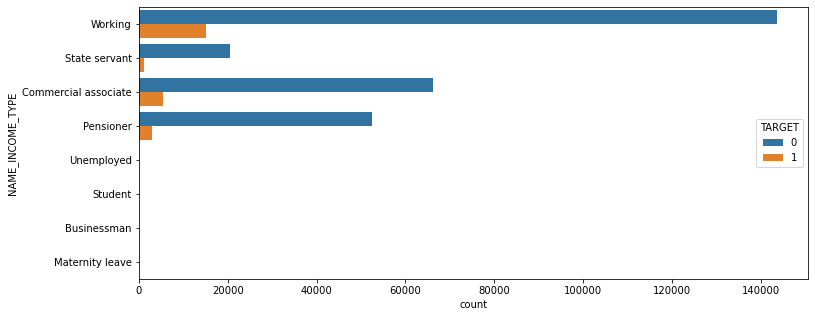

In [54]:
#Looking for trends in the column NAME_INCOME_TYPE against the target variable. The spread seems to be even across both.
plt.figure(figsize=(12,5))
sns.countplot(y = 'NAME_INCOME_TYPE', data = app, hue='TARGET' )
plt.show()

### Planning
Due to the high imbalance in the data, using the 'hue' paramter while plotting may not yeild discernible results at all. Hence, we can make use of the subplot functionality to view the plots side by side, for target value 0 vs target value 1

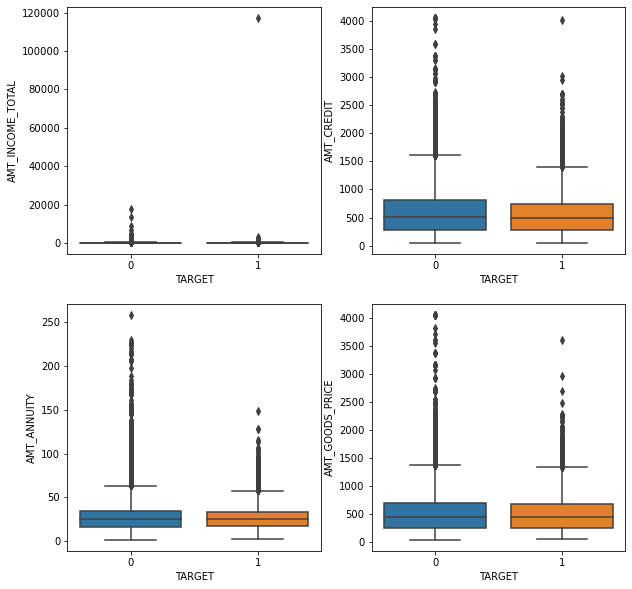

In [55]:
# Analysis for continuous variables
cont_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

plt.figure(figsize=(10,10))

for i in enumerate(cont_var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(y = i[1],x='TARGET',  data = app)

plt.show()

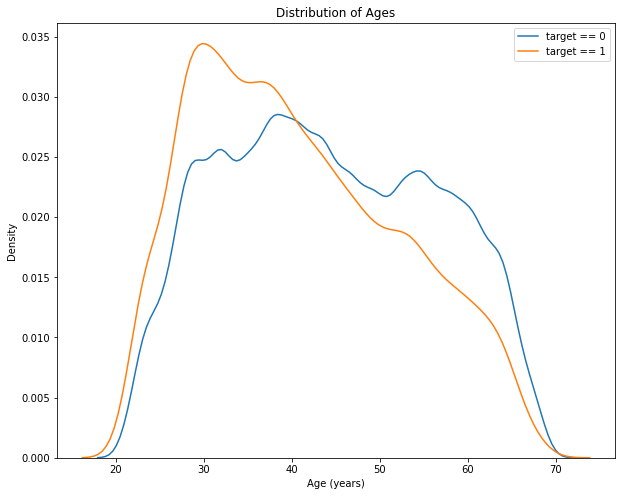

In [56]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app.loc[app['TARGET'] == 0, 'AGE'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app.loc[app['TARGET'] == 1, 'AGE'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.savefig('ages')

### Observation: 
* Younger applicants are a little more likely to default a payment than the older ones

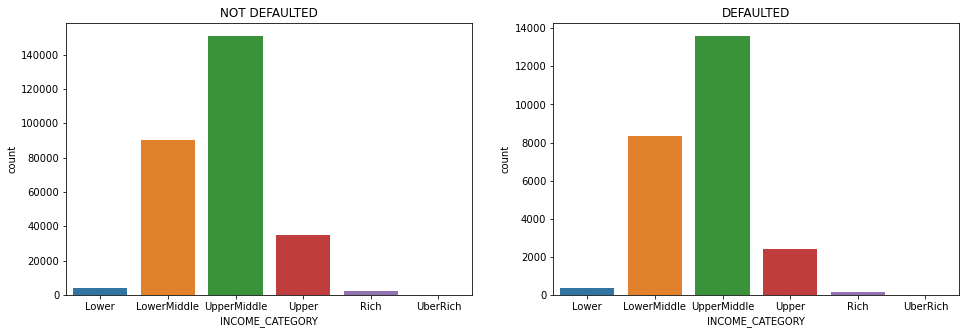

In [57]:
#We can see some outliers in the AMT_INCOME_TOTAL. Let's visualizing this using the binner variable we created.
## The spread seems to quite similar here.
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot('INCOME_CATEGORY', data=app0)
plt.title('NOT DEFAULTED')
plt.subplot(1,2,2)
sns.countplot('INCOME_CATEGORY', data=app1)
plt.title('DEFAULTED')
plt.show()

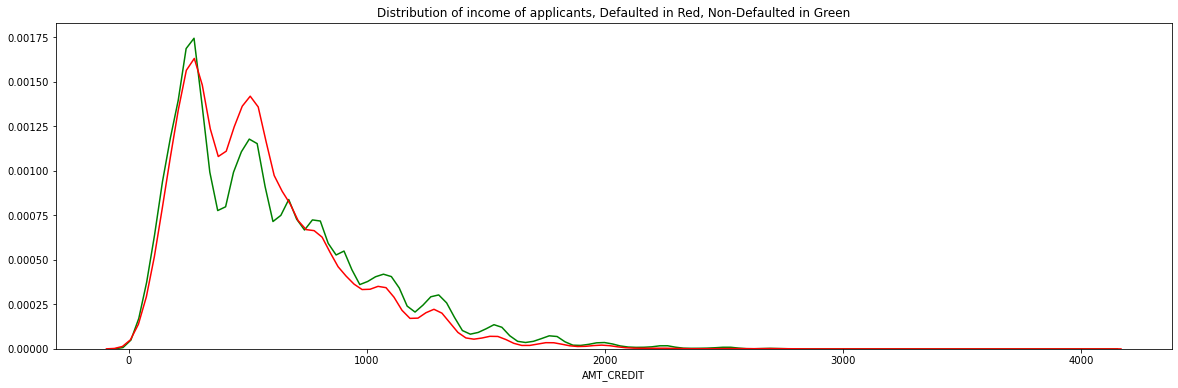

In [58]:
#Checking the spread of the total credit amount against the target variable 
plt.figure(figsize=(20,6))
sns.distplot(app0.AMT_CREDIT,hist=False,color='green')
sns.distplot(app1.AMT_CREDIT,hist=False,color='red')
plt.title('Distribution of income of applicants, Defaulted in Red, Non-Defaulted in Green')
plt.show()

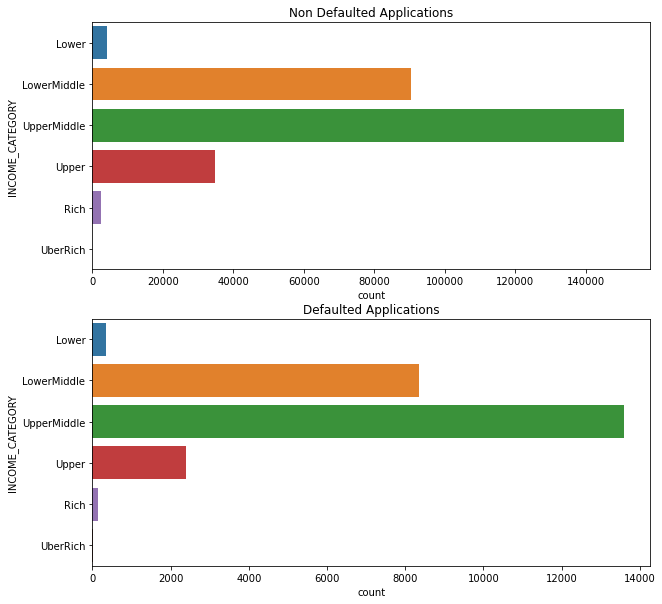

In [59]:
#Checking the income distrubution for target 0 vs 1; it turns out to be similar
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Non Defaulted Applications')
sns.countplot(y='INCOME_CATEGORY',data=app0)
plt.subplot(2,1,2)
plt.title('Defaulted Applications')
sns.countplot(y='INCOME_CATEGORY',data=app1)

In [60]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307499 non-null  int64   
 1   TARGET                        307499 non-null  int64   
 2   NAME_CONTRACT_TYPE            307499 non-null  object  
 3   CODE_GENDER                   307499 non-null  object  
 4   FLAG_OWN_CAR                  307499 non-null  object  
 5   FLAG_OWN_REALTY               307499 non-null  object  
 6   CNT_CHILDREN                  307499 non-null  int64   
 7   AMT_INCOME_TOTAL              307499 non-null  int64   
 8   AMT_CREDIT                    307499 non-null  int64   
 9   AMT_ANNUITY                   307499 non-null  int64   
 10  AMT_GOODS_PRICE               307221 non-null  float64 
 11  NAME_TYPE_SUITE               306207 non-null  object  
 12  NAME_INCOME_TYPE              

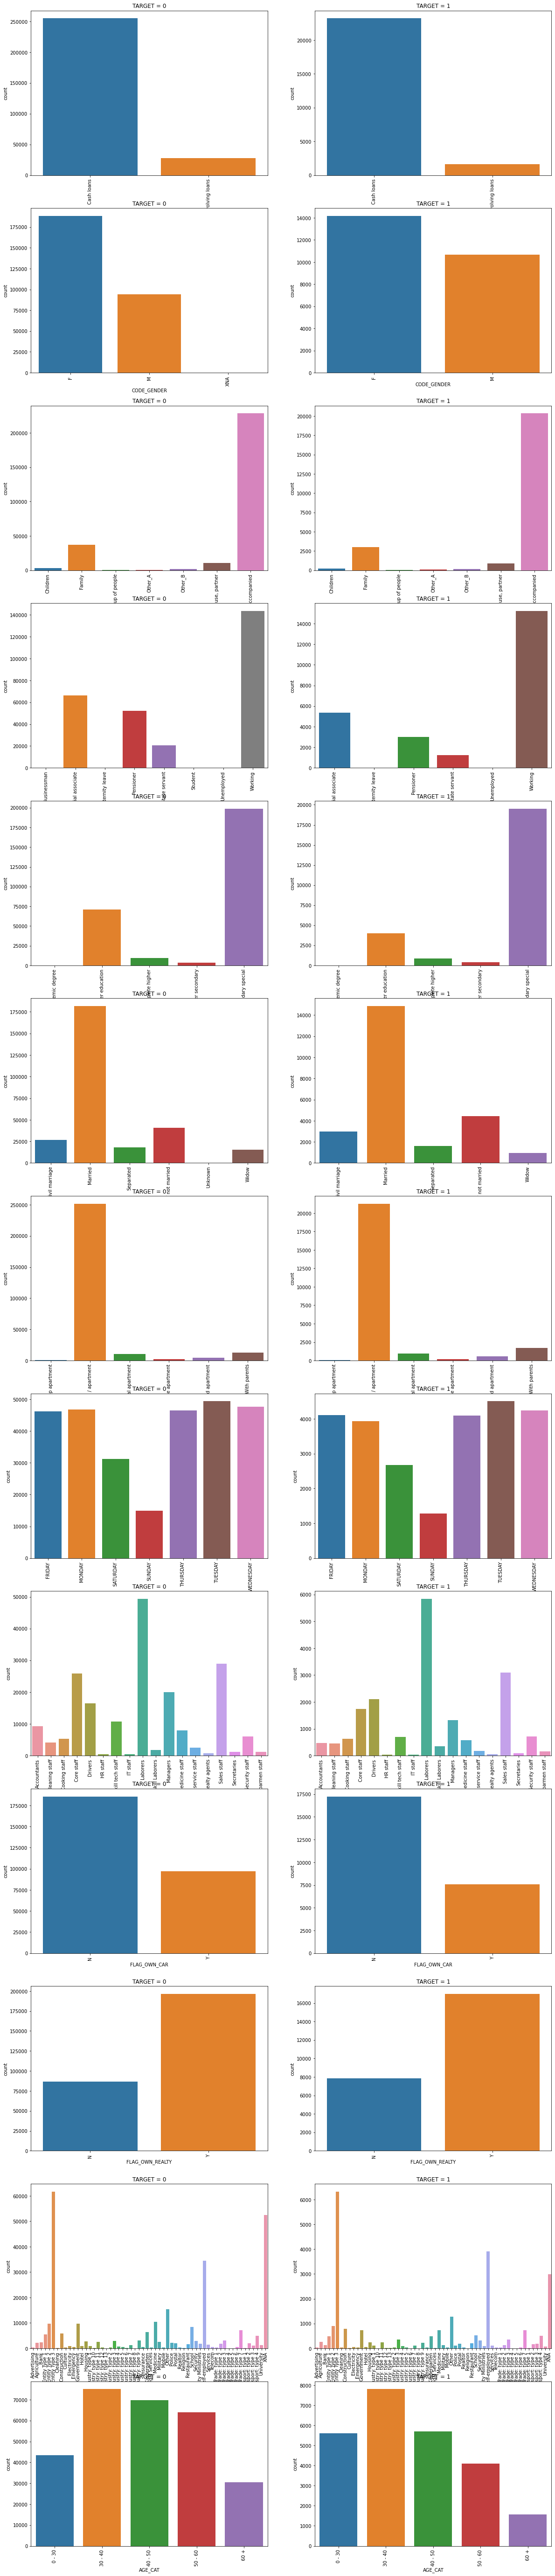

In [61]:
# Analysis of categorical variables
cat_list = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
            'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','OCCUPATION_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
            'ORGANIZATION_TYPE', 'AGE_CAT'
           ]

plt.figure(figsize=(20,100))
for i in enumerate(cat_list):
    plt.subplot(13,2,2*(i[0]+1)-1)
    plt.title('TARGET = 0')
    plt.xticks(rotation = 90)
    sns.countplot(x= i [1], data = app0.sort_values(by=i [1]))
    plt.subplot(13,2,2*(i[0]+1))
    plt.title('TARGET = 1')
    plt.xticks(rotation = 90)
    sns.countplot(x= i [1], data = app1.sort_values(by=i [1]))
    #plt.save
plt.show()

### Observations
* Females tend to default more than men do
* The labourer class has a high number of defaults

In [62]:
app['CODE_GENDER'].value_counts()

F      202440
M      105055
XNA         4
Name: CODE_GENDER, dtype: int64

In [63]:
app.loc[app['CODE_GENDER'] == 'XNA','CODE_GENDER'] = 'F'
app['CODE_GENDER'].value_counts()

F    202444
M    105055
Name: CODE_GENDER, dtype: int64

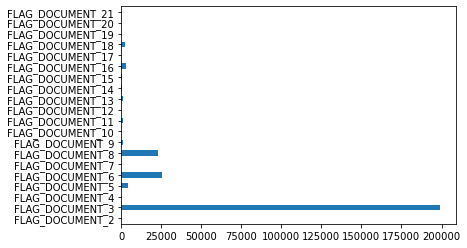

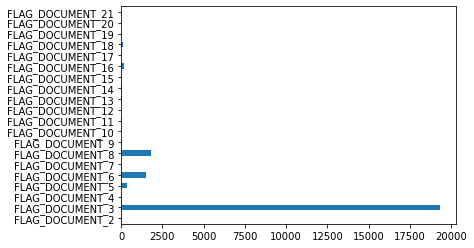

In [64]:
#Observing the documents submitted by those who did not default vs. those who defaulted
flag_list = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
             'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
             'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 
             'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

app0.loc[:, flag_list].sum(axis=0).plot.barh()
plt.show()
app1.loc[:, flag_list].sum(axis=0).plot.barh()
plt.show()

In [65]:
#The spread is almost similar, let's combine these flags into a single column
app.loc[:,'TOTAL_DOCS']=app.loc[:, flag_list].sum(axis=1)
app0.loc[:,'TOTAL_DOCS']=app0.loc[:, flag_list].sum(axis=1)
app1.loc[:,'TOTAL_DOCS']=app1.loc[:, flag_list].sum(axis=1)

In [66]:
# Now dropping the FLAG_DOCUMENT columns as we have already created a column for that.
app.drop(flag_list, axis=1, inplace = True)
app0.drop(flag_list, axis=1, inplace = True)
app1.drop(flag_list, axis=1, inplace = True)

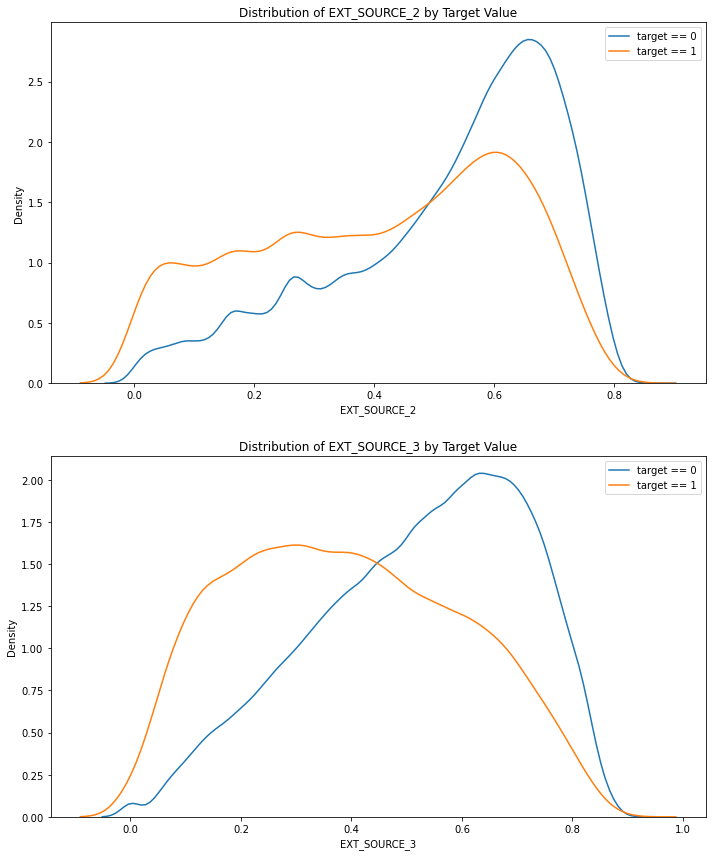

In [67]:
#There is some data from external sources present in the dataset. These seem to be ratings given by credit rating agencies.
#Let's see how the data links to these ratings.
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate([ 'EXT_SOURCE_2', 'EXT_SOURCE_3']): #EXT_SOURCE_1 was dropped since it had several null values
    
    # create a new subplot for each source
    plt.subplot(2, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app.loc[app['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app.loc[app['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### Observation:
* We can note here that EXT_SOURCE_3 seems to be realitvely better at rating a client's repayment tendency.
* The plot for defaulted payments skewed towards the left hand side, indicating that a low credit score can be used an indicator to represent repayment failure tendency

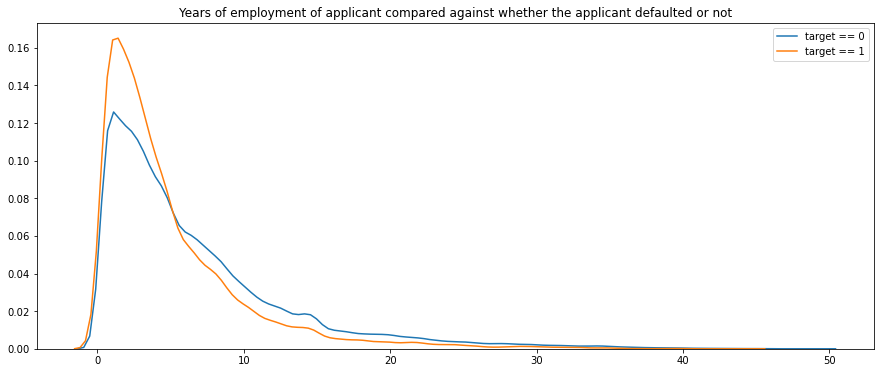

In [68]:
plt.figure(figsize=(15,6))
sns.kdeplot(app.loc[app['TARGET'] == 0, 'DAYS_EMPLOYED'].abs()/365, label = 'target == 0')
sns.kdeplot(app.loc[app['TARGET'] == 1, 'DAYS_EMPLOYED'].abs()/365, label = 'target == 1')
plt.title('Years of employment of applicant compared against whether the applicant defaulted or not')
plt.show()

### Observation
* We can see that the defaulting applicatns are skewed highly towards the left end, indicating that less experiences people with < 10 years of work experience are much more likely to default on a loan payment

In [69]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 66 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307499 non-null  int64   
 1   TARGET                        307499 non-null  int64   
 2   NAME_CONTRACT_TYPE            307499 non-null  object  
 3   CODE_GENDER                   307499 non-null  object  
 4   FLAG_OWN_CAR                  307499 non-null  object  
 5   FLAG_OWN_REALTY               307499 non-null  object  
 6   CNT_CHILDREN                  307499 non-null  int64   
 7   AMT_INCOME_TOTAL              307499 non-null  int64   
 8   AMT_CREDIT                    307499 non-null  int64   
 9   AMT_ANNUITY                   307499 non-null  int64   
 10  AMT_GOODS_PRICE               307221 non-null  float64 
 11  NAME_TYPE_SUITE               306207 non-null  object  
 12  NAME_INCOME_TYPE              

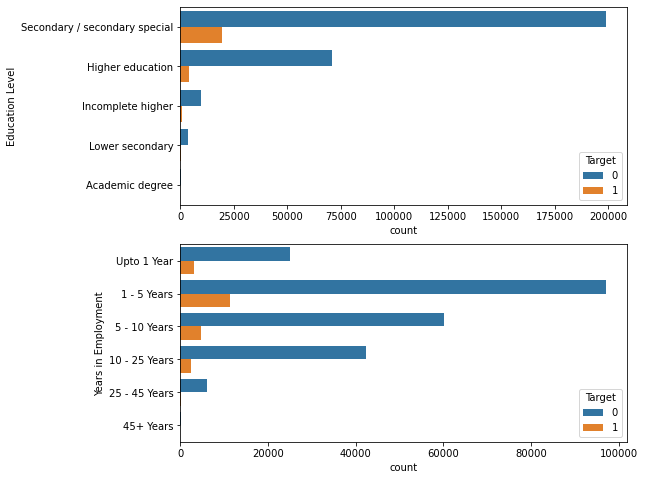

In [70]:
#Plotting education level and work experience 
plt.figure(figsize=(8,8))
plt.subplot(211)
sns.countplot(y='NAME_EDUCATION_TYPE',hue='TARGET',data=app)
plt.ylabel('Education Level')
plt.legend(title='Target',loc='lower right')
plt.subplot(212)
sns.countplot(y='YEARS_EMPLOYED',hue='TARGET',data=app)
plt.ylabel('Years in Employment')
plt.legend(title='Target',loc='lower right')
plt.show()

In [71]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 66 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307499 non-null  int64   
 1   TARGET                        307499 non-null  int64   
 2   NAME_CONTRACT_TYPE            307499 non-null  object  
 3   CODE_GENDER                   307499 non-null  object  
 4   FLAG_OWN_CAR                  307499 non-null  object  
 5   FLAG_OWN_REALTY               307499 non-null  object  
 6   CNT_CHILDREN                  307499 non-null  int64   
 7   AMT_INCOME_TOTAL              307499 non-null  int64   
 8   AMT_CREDIT                    307499 non-null  int64   
 9   AMT_ANNUITY                   307499 non-null  int64   
 10  AMT_GOODS_PRICE               307221 non-null  float64 
 11  NAME_TYPE_SUITE               306207 non-null  object  
 12  NAME_INCOME_TYPE              

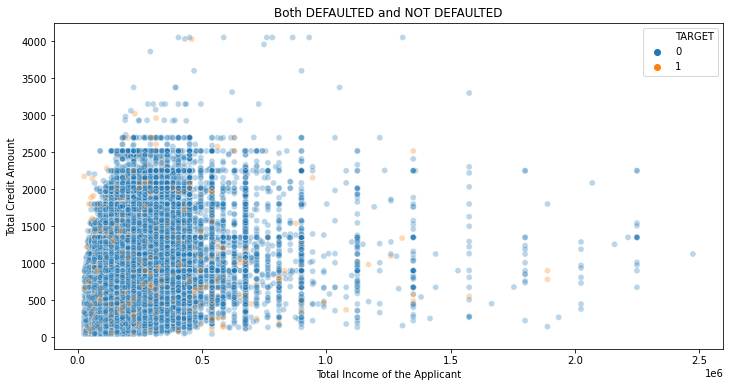

In [72]:
#Checking the income vs credit amount against the target variable 
plt.figure(figsize=(12,6))
sns.scatterplot(x='AMT_INCOME_TOTAL_original', y='AMT_CREDIT', data=app.loc[app.AMT_INCOME_TOTAL < 2500], hue='TARGET',alpha=0.3)
plt.xlabel('Total Income of the Applicant')
plt.ylabel('Total Credit Amount')
plt.title('Both DEFAULTED and NOT DEFAULTED')
plt.show()

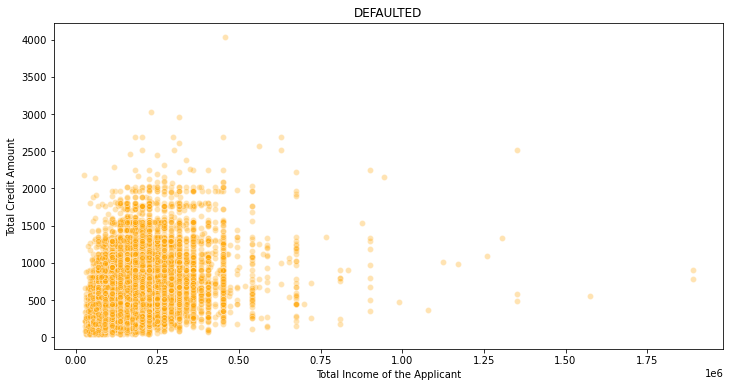

In [73]:
#Checking the income vs credit amount against the target variable 
plt.figure(figsize=(12,6))
sns.scatterplot(x='AMT_INCOME_TOTAL_original', y='AMT_CREDIT', data=app1.loc[app1.AMT_INCOME_TOTAL < 2500], alpha=0.3,color='orange')
plt.xlabel('Total Income of the Applicant')
plt.title('DEFAULTED')
plt.ylabel('Total Credit Amount')
plt.show()

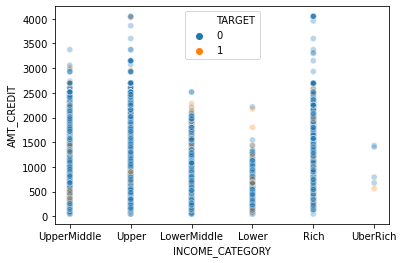

In [74]:
#Let's also obserrve the same using the binned column we created
sns.scatterplot(x='INCOME_CATEGORY', y='AMT_CREDIT', data=app, hue='TARGET',alpha=0.3)

### Observation
* An applicant was found to be more likely to default on the payment in the smaller income bracket.
* In the lower middle class applicants, the default percentage is seen to be higher when they apply for high value loans with a credit amount of >2000k

In [75]:
#Let's check the correlation matrix for the two cases, one where target variable is 1, and second where target variable is 0
corr0=app0[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE',]].corr()
corr1=app1[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE',]].corr()

In [76]:
corr0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corrdf0 = corr0.unstack().reset_index()
corrdf0.head()

,level_0,level_1,0
0,CNT_CHILDREN,CNT_CHILDREN,NaN
1,CNT_CHILDREN,AMT_INCOME_TOTAL,NaN
2,CNT_CHILDREN,AMT_CREDIT,NaN
3,CNT_CHILDREN,AMT_ANNUITY,NaN
4,CNT_CHILDREN,AMT_GOODS_PRICE,NaN


In [77]:
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# We will be using absolute value of the correlation coefficiaents since we are only interested in seeing the absolute value.
# The dirction in which the entities are correlated is currently not of concern
corrdf0['Correlation'] = corrdf0['Correlation'].abs()

In [78]:
corr1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corrdf1 = corr1.unstack().reset_index()
corrdf1.head()

,level_0,level_1,0
0,CNT_CHILDREN,CNT_CHILDREN,NaN
1,CNT_CHILDREN,AMT_INCOME_TOTAL,NaN
2,CNT_CHILDREN,AMT_CREDIT,NaN
3,CNT_CHILDREN,AMT_ANNUITY,NaN
4,CNT_CHILDREN,AMT_GOODS_PRICE,NaN


In [79]:
corrdf1.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf1.dropna(subset = ['Correlation'], inplace = True)
corrdf1['Correlation'] = round(corrdf1['Correlation'], 2)
# We will be using absolute value of the correlation coefficiaents since we are only interested in seeing the absolute value.
# The dirction in which the entities are correlated is currently not of concern
corrdf1['Correlation'] = corrdf1['Correlation'].abs()

In [80]:
#Inspecintg the TOP 10 correlated variables in the app1 dataframe, which indicates applicants who defaulted
corrdf1.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
86,AMT_GOODS_PRICE,AMT_CREDIT,0.98
147,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
65,AMT_ANNUITY,AMT_CREDIT,0.75
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
425,AGE,DAYS_REGISTRATION,0.29
197,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT,0.29
420,AGE,CNT_CHILDREN,0.26
329,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.25
239,EXT_SOURCE_2,REGION_RATING_CLIENT,0.25
426,AGE,DAYS_ID_PUBLISH,0.25


In [81]:
#Inspecintg the TOP 10 correlated variables in the app0 dataframe, which indicates applicants who did not default
corrdf0.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
86,AMT_GOODS_PRICE,AMT_CREDIT,0.99
147,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
65,AMT_ANNUITY,AMT_CREDIT,0.77
64,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
85,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
43,AMT_CREDIT,AMT_INCOME_TOTAL,0.34
420,AGE,CNT_CHILDREN,0.34
425,AGE,DAYS_REGISTRATION,0.33
239,EXT_SOURCE_2,REGION_RATING_CLIENT,0.29


### Observation:
* Both the data sets are showing a similar set of variables with a high correlation value

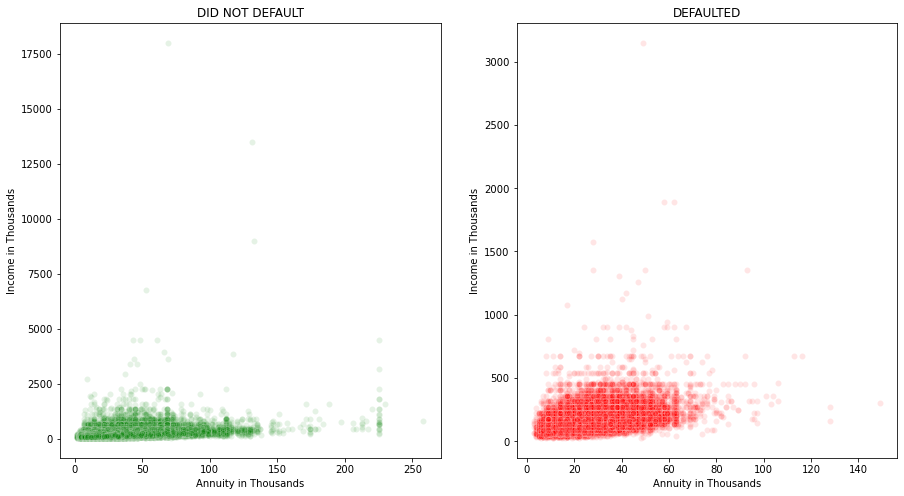

In [82]:
#Income vs Annuity
#Here we observe that the income and annuity observe a low|low trend for the defaulters. 
#High income earners who get loans for higher annuity values end up defaulting much lesser than those..
#...in the low income bracket, even when they opt for lower annuity
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('DID NOT DEFAULT')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_INCOME_TOTAL',data=app0,alpha=0.1,color='green')
plt.ylabel('Income in Thousands')
plt.xlabel('Annuity in Thousands')
plt.subplot(1,2,2)
plt.title('DEFAULTED')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_INCOME_TOTAL',data=app1[app1.AMT_INCOME_TOTAL < 20000],alpha=0.1,color='red')
plt.ylabel('Income in Thousands')
plt.xlabel('Annuity in Thousands')
plt.show()

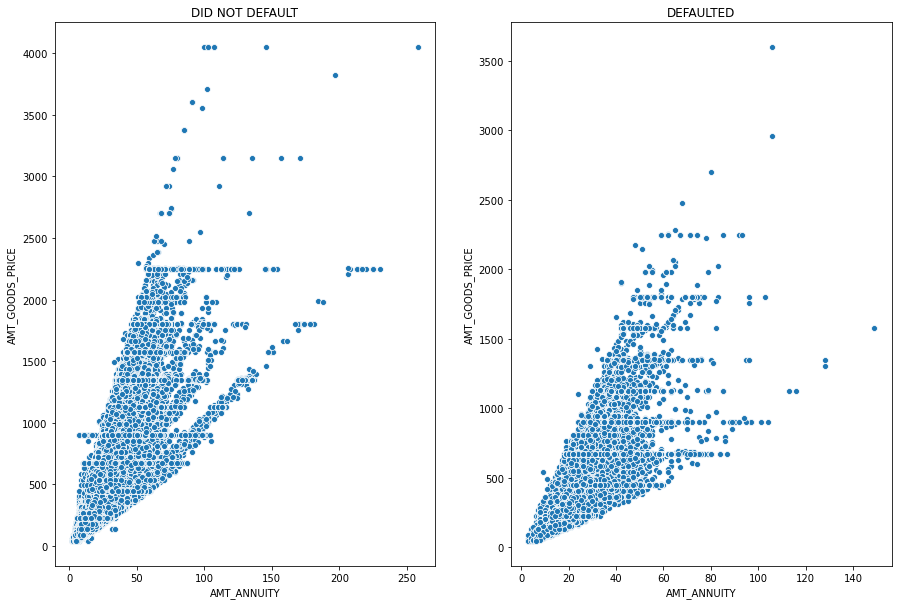

In [83]:
#AMT_GOODS_PRICE vs AMT_ANNUITY
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('DID NOT DEFAULT')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=app0)
plt.subplot(1,2,2)
plt.title('DEFAULTED')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=app1)
plt.show()

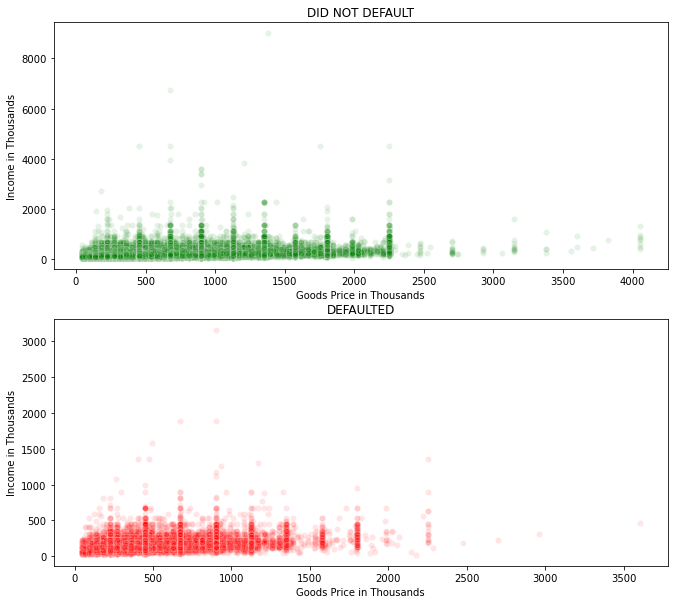

In [84]:
#AMT_GOODS_RPICE vs AMT_TOTAL_INCOME
#Here we observe that low income earning applicants who seek to buy high value goods are more likely to default on payments
plt.figure(figsize=(11,10))
plt.subplot(211)
plt.title('DID NOT DEFAULT')
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_INCOME_TOTAL',data=app0[app0.AMT_INCOME_TOTAL < 10000],alpha=0.1, color='green')
plt.xlabel('Goods Price in Thousands')
plt.ylabel('Income in Thousands')
plt.subplot(212)
plt.title('DEFAULTED')
sns.scatterplot(x='AMT_GOODS_PRICE',y='AMT_INCOME_TOTAL',data=app1[app1.AMT_INCOME_TOTAL < 10000],alpha=0.1, color='red')
plt.xlabel('Goods Price in Thousands')
plt.ylabel('Income in Thousands')
plt.savefig('appllesss')
plt.show()

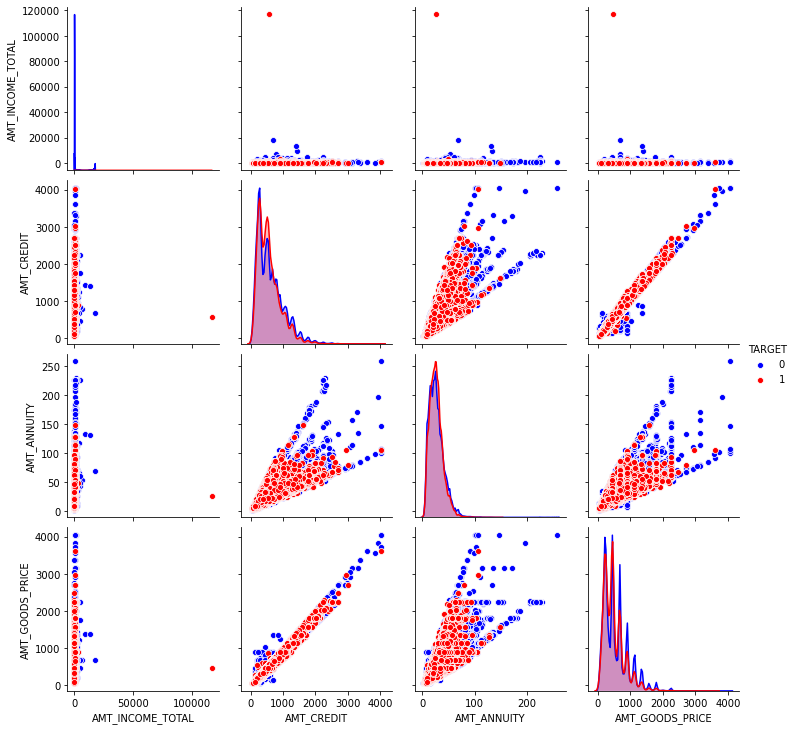

In [85]:
#Let's check the pairplot for amount variables once, to spot any trends
amt = app[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

### Observation
* A lot of defaulters were concentrated in the low income region .
* The annuity amount for the loans issued to these defaulters was also low, yet they defaulted on the payments.

In [86]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_TOTAL_original,INCOME_CATEGORY,AGE_CAT,YEARS_EMPLOYED,TOTAL_DOCS
0,100002,1,Cash loans,M,N,Y,0,202,407,25,351.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637.0,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26,202500.0,UpperMiddle,0 - 30,1 - 5 Years,1
1,100003,0,Cash loans,F,N,N,0,270,1294,36,1129.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188.0,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,46,270000.0,Upper,40 - 50,1 - 5 Years,1
2,100004,0,Revolving loans,M,Y,Y,0,68,135,7,135.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225.0,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52,67500.0,LowerMiddle,50 - 60,Upto 1 Year,0
3,100006,0,Cash loans,F,N,Y,0,135,313,30,297.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039.0,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,52,135000.0,UpperMiddle,50 - 60,5 - 10 Years,1
4,100007,0,Cash loans,M,N,Y,0,122,513,22,513.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038.0,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,55,121500.0,UpperMiddle,50 - 60,5 - 10 Years,1


In [87]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
prev.shape

(1670214, 37)

In [89]:
prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Cleaning the data in previous application file

In [90]:
#Inspecing null values
100*round(prev.isnull().sum()/len(prev),4)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [91]:
#Retaining only those columns with less than 50% null values
prev=prev.loc[:,100*round(prev.isnull().sum()/len(prev),4)<50]

In [92]:
100*round(prev.isnull().sum()/len(prev),4)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [93]:
#Dropping columns that we'll not be using 
prev.drop(['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION'],axis=1,inplace=True)

In [94]:
prev.shape

(1670214, 28)

In [95]:
#Some columns can be imputed
#Checking what these columns are, in which we can safely impute values
cols_to_impute = list(prev.loc[:,(100*round(prev.isnull().sum()/len(app),4) > 0) & (100*round(prev.isnull().sum()/len(prev),4) <25)].columns)
cols_to_impute

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION']

In [96]:
#Checking what these columns look like, and what data they hold
for i in enumerate(cols_to_impute):
    print(i[1],'\n')
    print((prev[i[1]].describe()))
    print('\n')

AMT_ANNUITY 

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


AMT_GOODS_PRICE 

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


CNT_PAYMENT 

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


PRODUCT_COMBINATION 

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object




### Observation
* The data in 3 of these columns is numerical, and 1 is categorical wiht 17 unique values.

In [97]:
#We create another list of columns with only the numerical variables that we wish to impute null values for
num_cols_to_impute=cols_to_impute.copy()
num_cols_to_impute.remove('PRODUCT_COMBINATION')

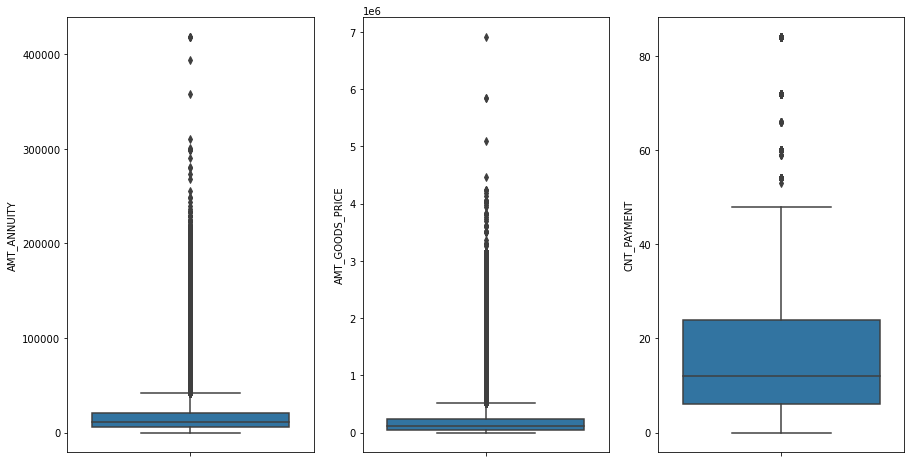

In [98]:
plt.figure(figsize=(15,8))

for i in enumerate(num_cols_to_impute):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(y=i[1],data=prev)

plt.show()

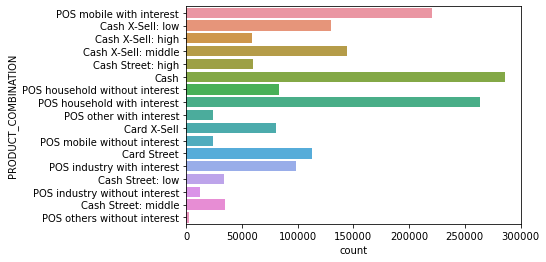

In [99]:
#Let's also visualize the categorical variable and see what the spread is like
sns.countplot(y='PRODUCT_COMBINATION',data=prev)
plt.show()

### Observations
* If we wish to impute, we'll need to use the median for the columns AMT_ANNUITY and AMT_GOODS_PRICE since there are a significant number of outliers in the data which would skew the mean
* For imputing null values in the categorical varaible PRODUCT_COMBINATION, we can go with the mode of the data, which is 'Cash'
* CNT_PAYMENT has an even spread, and we can choose mean for imputing values in this column

In [100]:
#Let's check if any numerical columns have negative values which don't make sense (for example, negative age)
prev.min()

SK_ID_PREV                                          1000001
SK_ID_CURR                                           100001
NAME_CONTRACT_TYPE                               Cash loans
AMT_ANNUITY                                               0
AMT_APPLICATION                                           0
AMT_CREDIT                                                0
AMT_GOODS_PRICE                                           0
WEEKDAY_APPR_PROCESS_START                           FRIDAY
HOUR_APPR_PROCESS_START                                   0
FLAG_LAST_APPL_PER_CONTRACT                               N
NFLAG_LAST_APPL_IN_DAY                                    0
NAME_CASH_LOAN_PURPOSE         Building a house or an annex
NAME_CONTRACT_STATUS                               Approved
DAYS_DECISION                                         -2922
NAME_PAYMENT_TYPE                     Cash through the bank
CODE_REJECT_REASON                                   CLIENT
NAME_CLIENT_TYPE                        

In [101]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [102]:
#DAYS_DECISION is signifying number of days when was the decision about previous application made
#this cannot be negative, let's change it to posiitve
prev['DAYS_DECISION']=prev.DAYS_DECISION.apply(lambda x:abs(x))

### Starting with anlyzing previous application file now

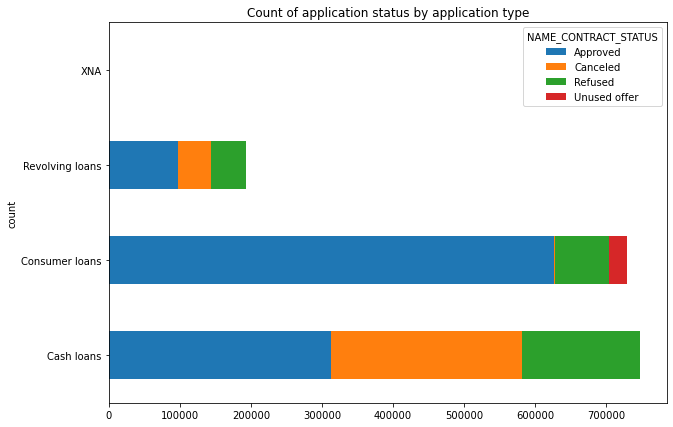

In [103]:
#Let's see drill-down of each type of loan by the status
ax = pd.crosstab(prev["NAME_CONTRACT_TYPE"],prev["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
plt.show()

### Observation:
* We see a hug enumber of canceled loans in the cash loans sector, and the same sector also attracts a lot of refused loans
* The highest number of approved loans lie in the consumer loans sector

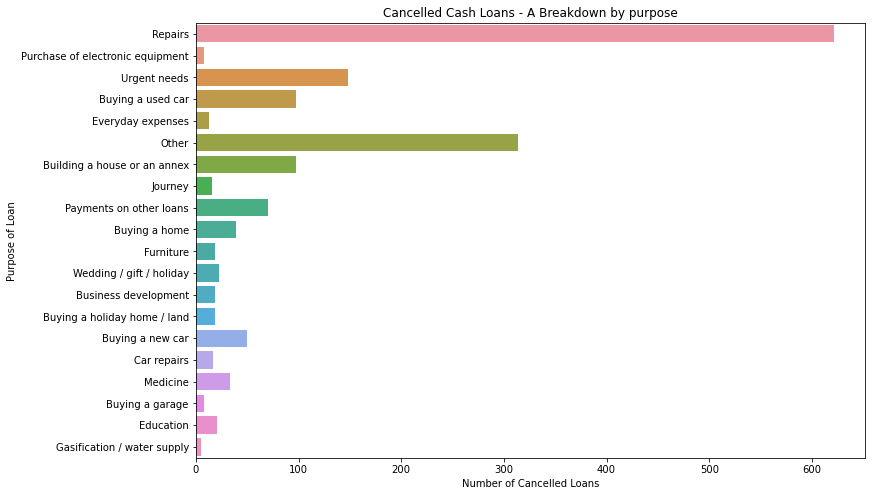

In [104]:
#Let's see what is the exact ype of cash loans that get cancelled
plt.figure(figsize=(12,8))
sns.countplot(y='NAME_CASH_LOAN_PURPOSE',data=prev[(prev['NAME_CONTRACT_STATUS']=='Canceled') & (prev['NAME_CONTRACT_TYPE']=='Cash loans') & (prev['NAME_CASH_LOAN_PURPOSE'] != 'XNA')])
plt.xlabel('Number of Cancelled Loans')
plt.ylabel('Purpose of Loan')
plt.savefig('CancelledPurposeCashLoan')
plt.title('Cancelled Cash Loans - A Breakdown by purpose')
plt.show()

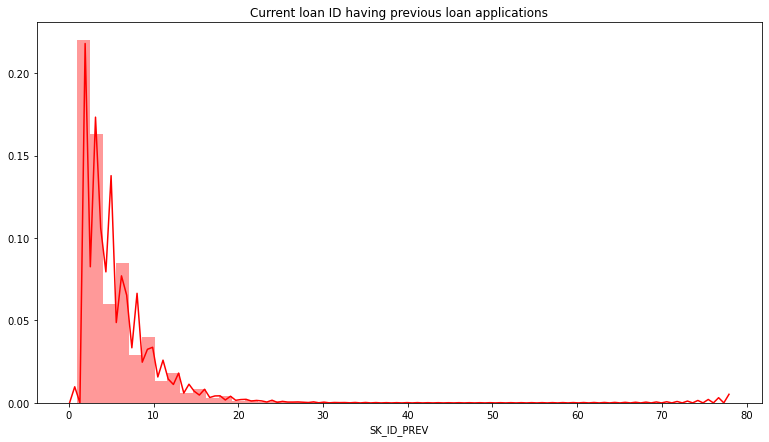

In [105]:
#Let's see the count of previous loans available for the current loans we have in the app dataframe
x = prev.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="red")
plt.title("Current loan ID having previous loan applications")
plt.show()

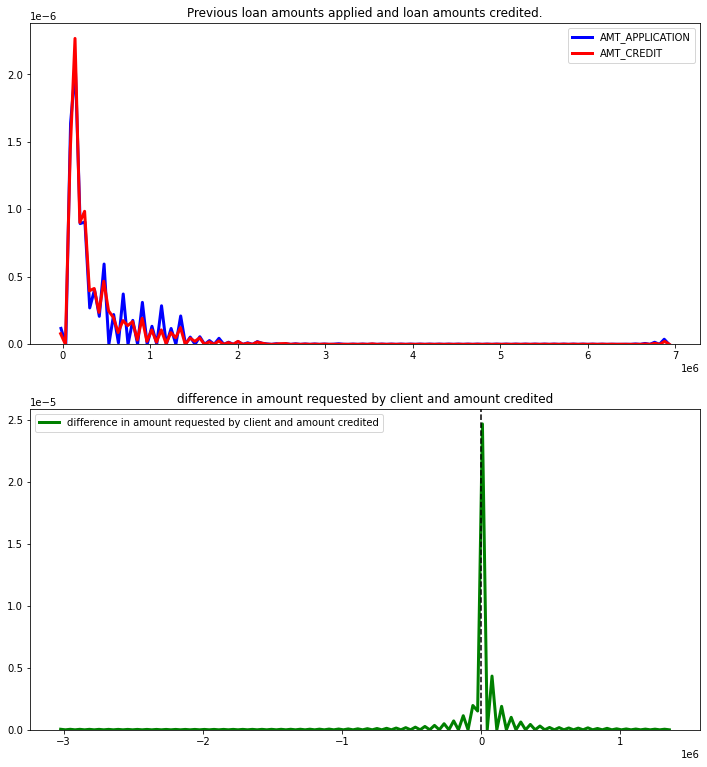

In [106]:
#It's also observed that the loan application amount, and the actual amount credited was not the same.
#We see in the plots that these two factors differed by both positive and negative values
#This implies that while there were instances when the bank granted a loan for an amount less than the application amount, 
#there were also instances when the loan was granted for an amount higher than application amount
plt.figure(figsize=(12,13))
plt.subplot(211)
ax = sns.kdeplot(prev["AMT_APPLICATION"],color="b",linewidth=3)
ax = sns.kdeplot(prev[prev["AMT_CREDIT"].notnull()]["AMT_CREDIT"],color="r",linewidth=3)
plt.title("Previous loan amounts applied and loan amounts credited.")

plt.subplot(212)
diff = (prev["AMT_CREDIT"] - prev["AMT_APPLICATION"]).reset_index()
diff = diff[diff[0].notnull()]
ax1 = sns.kdeplot(diff[0],color="g",linewidth=3,label = "difference in amount requested by client and amount credited")
plt.title("difference in amount requested by client and amount credited")
plt.axvline(0,color="black",linestyle="dashed",label = "Zero")

In [107]:
prev.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

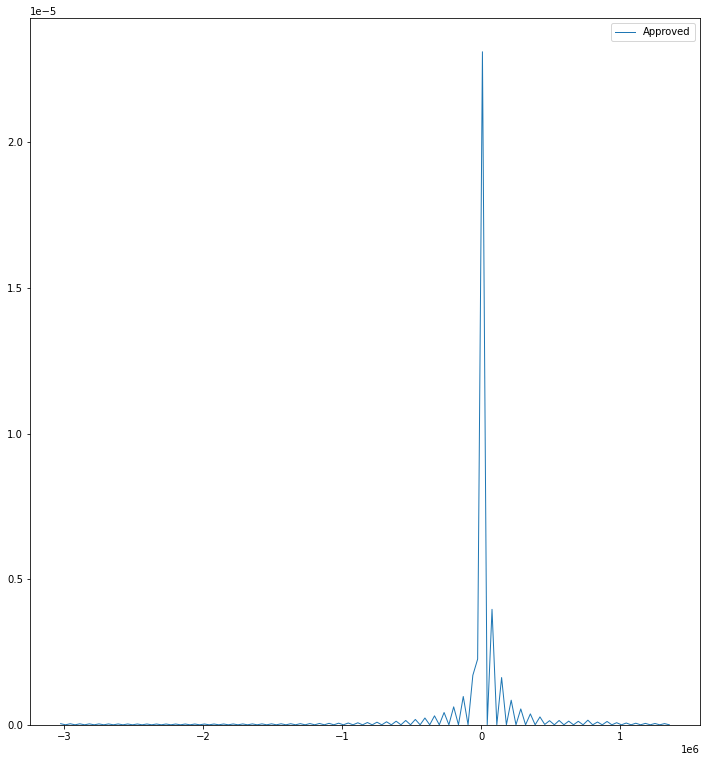

In [108]:
#Analysis of difference in credit amount and application amount seen against the application status
plt.figure(figsize=(12,13))
a1=sns.kdeplot(prev[prev.NAME_CONTRACT_STATUS == 'Approved']['AMT_CREDIT'] -
               prev[prev.NAME_CONTRACT_STATUS == 'Approved']['AMT_APPLICATION'],
               label = 'Approved', linewidth= 1)
a2=sns.kdeplot(prev[prev.NAME_CONTRACT_STATUS == 'Canceled']['AMT_CREDIT'] -
               prev[prev.NAME_CONTRACT_STATUS == 'Canceled']['AMT_APPLICATION'], 
               label = 'Canceled', linewidth= 1)
a3=sns.kdeplot(prev[prev.NAME_CONTRACT_STATUS == 'Refused']['AMT_CREDIT'] -
               prev[prev.NAME_CONTRACT_STATUS == 'Refused']['AMT_APPLICATION'], 
               label = 'Refused', linewidth= 1)
a4=sns.kdeplot(prev[prev.NAME_CONTRACT_STATUS == 'Unused offer']['AMT_CREDIT'] -
               prev[prev.NAME_CONTRACT_STATUS == 'Unused offer']['AMT_APPLICATION'], 
               label = 'Unused offer', linewidth= 1)
plt.axvline(0,color="black",linestyle="dashed",label = "Zero")
plt.title('Difference between credit and application amount against status of contract')

```plt.figure(figsize=(12,13))
a1=sns.kdeplot(prev[prev.NAME_CONTRACT_STATUS == 'Approved']['AMT_CREDIT'], label = 'Approved', linewidth=3)
a2=sns.kdeplot(prev[prev.NAME_CONTRACT_STATUS == 'Canceled']['AMT_CREDIT'], label = 'Canceled', linewidth=3)
a3=sns.kdeplot(prev[prev.NAME_CONTRACT_STATUS == 'Refused']['AMT_CREDIT'], label = 'Refused', linewidth=3)
a4=sns.kdeplot(prev[prev.NAME_CONTRACT_STATUS == 'Unused offer']['AMT_CREDIT'], label = 'Unused offer', linewidth=3)
plt.title('Amount of Credit compared against contract status')
```

### Observation
* A large number of cancelled loans lie in the low value loans

In [110]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

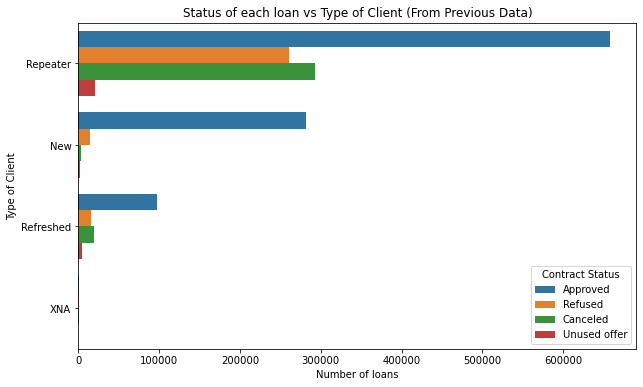

In [111]:
#let's see how the bank is treating its different types of clients
plt.figure(figsize=(10,6))
sns.countplot(y='NAME_CLIENT_TYPE',data=prev,hue='NAME_CONTRACT_STATUS')
plt.xlabel('Number of loans')
plt.ylabel('Type of Client')
plt.title('Status of each loan vs Type of Client (From Previous Data)')
plt.legend(title='Contract Status', loc= 'lower right')
plt.show()

In [112]:
#We now try to see how these approved loans turned out in each category.
newapprovals=prev[(prev['NAME_CONTRACT_STATUS']=='Approved')][['SK_ID_CURR','NAME_CLIENT_TYPE']]

In [113]:
newapprovals.head()

,SK_ID_CURR,NAME_CLIENT_TYPE
0,271877,Repeater
1,108129,Repeater
2,122040,Repeater
3,176158,Repeater
5,199383,Repeater


In [114]:
merged_new_approvals = newapprovals.merge(app, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [115]:
#Merging selected data from previous with application data (current)
new_approvals_by_default = merged_new_approvals[['SK_ID_CURR','NAME_CLIENT_TYPE','TARGET']]

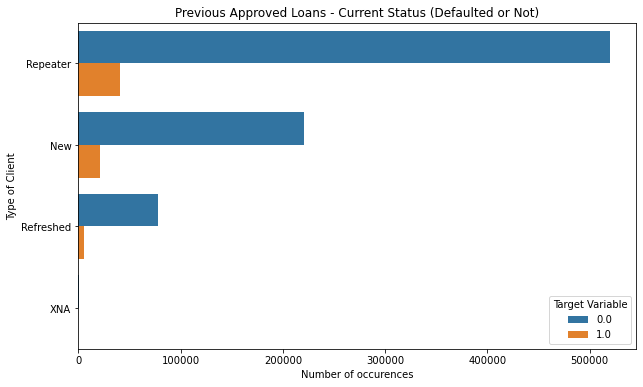

In [116]:
#This plot shows all the loans which were marked as "Approved" in the previous applications, 
#and their statuses in the current applications.
plt.figure(figsize=(10,6))
ax=sns.countplot(y='NAME_CLIENT_TYPE',data=new_approvals_by_default,hue='TARGET')
plt.title('Previous Approved Loans - Current Status (Defaulted or Not)')
plt.ylabel('Type of Client')
plt.xlabel('Number of occurences')
plt.legend(title='Target Variable',loc='lower right')
plt.show()

### Observation
* We see that the highest number of loan approvals are occuring for repeat clients, while loans are being very rarely refused to new customers. 
* Repeat Clients are also defaulting on payments the most.
* There is also a significant chunk of "New" clients with defaulted payments

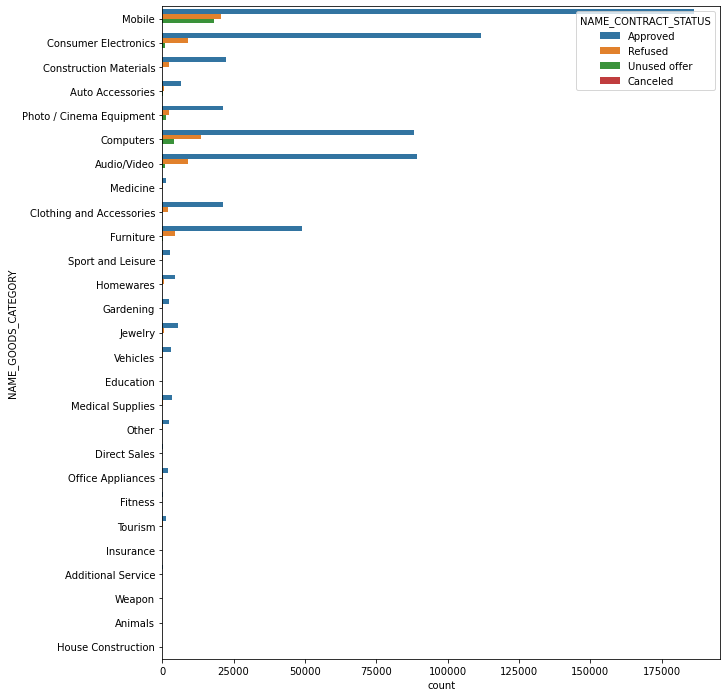

In [117]:
#Checking how the category of goods being bought is impacting the loan approval status 
plt.figure(figsize=(10,12))
sns.countplot(y='NAME_GOODS_CATEGORY',hue='NAME_CONTRACT_STATUS',data=prev[prev.NAME_GOODS_CATEGORY!='XNA'])

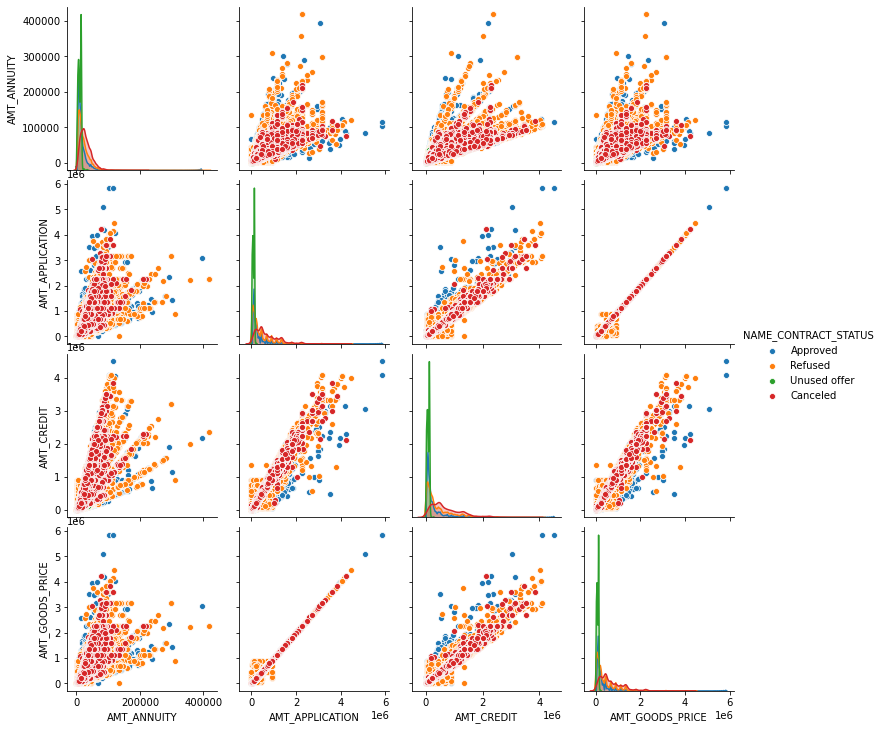

In [118]:
#Let's see the pair plots between same numerical variables in the previous application data
amtp = prev[[ 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CONTRACT_STATUS']]
amtp = amtp[(amtp["AMT_GOODS_PRICE"].notnull()) & (amtp["AMT_ANNUITY"].notnull())]
sns.pairplot(amtp,hue="NAME_CONTRACT_STATUS")
plt.show()

In [119]:
#Let's check the correlation matrix for the previous application dataset
corr=prev[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY',
           'DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','NFLAG_INSURED_ON_APPROVAL']].corr()


In [120]:
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.head()

,level_0,level_1,0
0,AMT_ANNUITY,AMT_ANNUITY,NaN
1,AMT_ANNUITY,AMT_APPLICATION,NaN
2,AMT_ANNUITY,AMT_CREDIT,NaN
3,AMT_ANNUITY,AMT_GOODS_PRICE,NaN
4,AMT_ANNUITY,HOUR_APPR_PROCESS_START,NaN


In [121]:
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# We will be using absolute value of the correlation coefficiaents since we are only interested in seeing the absolute value.
# The direction in which the entities are correlated is currently not of concern
corrdf['Correlation'] = corrdf['Correlation'].abs()

In [122]:
#Inspecting the top-10 correlated entities
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
31,AMT_GOODS_PRICE,AMT_APPLICATION,1.00
32,AMT_GOODS_PRICE,AMT_CREDIT,0.99
21,AMT_CREDIT,AMT_APPLICATION,0.98
20,AMT_CREDIT,AMT_ANNUITY,0.82
30,AMT_GOODS_PRICE,AMT_ANNUITY,0.82
10,AMT_APPLICATION,AMT_ANNUITY,0.81
81,CNT_PAYMENT,AMT_APPLICATION,0.68
83,CNT_PAYMENT,AMT_GOODS_PRICE,0.67
82,CNT_PAYMENT,AMT_CREDIT,0.67
80,CNT_PAYMENT,AMT_ANNUITY,0.39


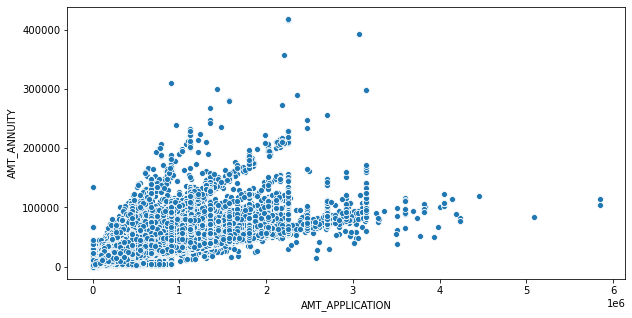

In [123]:
#AMT_APPLICATION vs AMT_ANNUITY
#Here we can notice a steady rice in the annuity amount with a rise in the application amount
plt.figure(figsize=(10,5))
sns.scatterplot(x='AMT_APPLICATION',y='AMT_ANNUITY',data=prev)
plt.show()

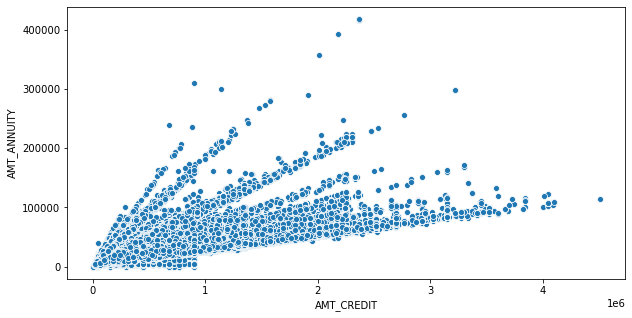

In [124]:
#AMT_ANNUITY vs AMT_CREDIT
#We see an almost proportional increase in annuity amount with an increase in the credit amount 
plt.figure(figsize=(10,5))
sns.scatterplot(y='AMT_ANNUITY',x='AMT_CREDIT',data=prev)
plt.show()

In [125]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

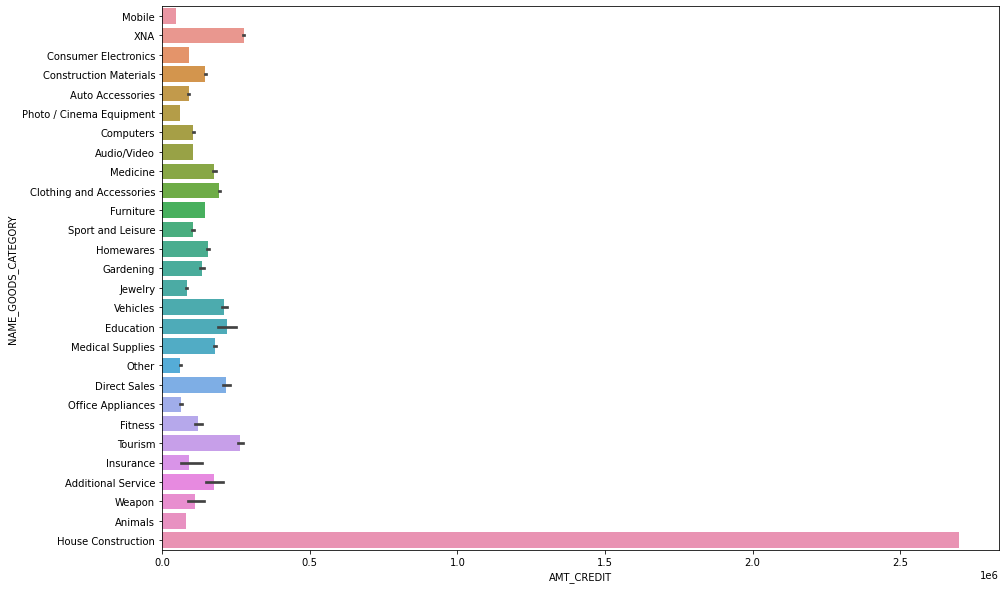

In [126]:
#Let's check the Amount of credit requested in various goods_categories
plt.figure(figsize =(15,10))
sns.barplot(x ='AMT_CREDIT', y="NAME_GOODS_CATEGORY", data = prev )
plt.show()

### Observation
* We have a very major outlier here! Home Counstruction is outperforming every other category in terms of credit

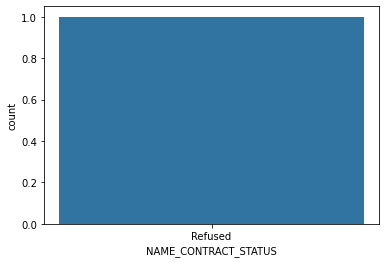

In [127]:
#Let's the see the number of loans in this category and the status of these loans
sns.countplot('NAME_CONTRACT_STATUS', data = prev[prev.NAME_GOODS_CATEGORY == 'House Construction'])

In [128]:
prev[prev.NAME_GOODS_CATEGORY=='House Construction']

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL
941660,2619459,310031,Consumer loans,78948.0,3000001.5,2700000.0,3000001.5,TUESDAY,9,Y,1,XAP,Refused,381,Cash through the bank,LIMIT,Family,Repeater,House Construction,POS,XNA,Stone,10,XNA,60.0,low_normal,POS other with interest,NaN


### Observation
* We get only one record, and as expected, the bank has refused this loan with a credit request of an obnoxiously large amount
* This is an outlier in the data, but seems genuine since it was rejected.

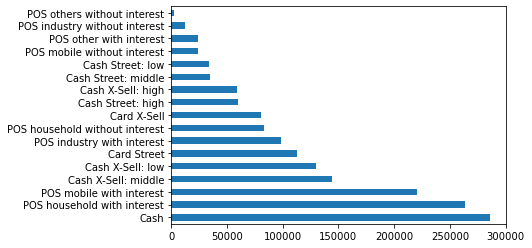

In [129]:
prev['PRODUCT_COMBINATION'].value_counts().plot(kind = 'barh')

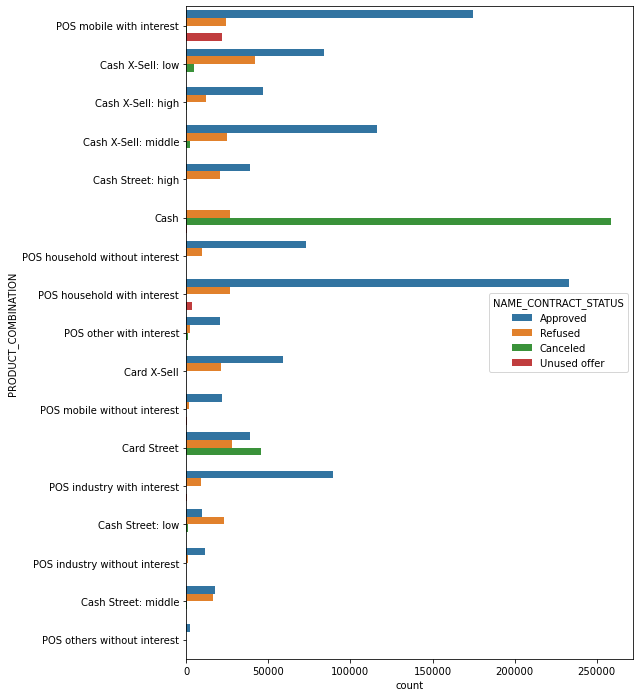

In [130]:
#Cash loans are seeing the most cancellations, while almost all the unused offers lie in the 'POS mobile with interest' combo
plt.figure(figsize=(8,12))
sns.countplot(y='PRODUCT_COMBINATION', data = prev, hue = 'NAME_CONTRACT_STATUS')

In [131]:
prev['CNT_PAYMENT'].value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
29.0         8
28.0         8
32.0         6
19.0         6
34.0         4
59.0         4
45.0         3
41.0         3
47.0         3
21.0         3
44.0         2
39.0         2
38.0         2
46.0         2
40.0         1
33.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [132]:
#We will bin the CNT_PAYMENT variable to analyze it categorically
prev['CNT_PAYMENT_BINNED']=pd.cut(prev['CNT_PAYMENT'], bins=[0,10,20,30,40,50,60,70,80,90], 
                         labels = ['0 - 10','10 - 20', '20 - 30','30 - 40','40 - 50','50 - 60','60 - 70','70 - 80','80 - 90'])

In [133]:
prev['CNT_PAYMENT_BINNED'].value_counts()

10 - 20    417925
0 - 10     397312
20 - 30    154784
30 - 40     72610
50 - 60     55709
40 - 50     54465
70 - 80       139
80 - 90        45
60 - 70        10
Name: CNT_PAYMENT_BINNED, dtype: int64

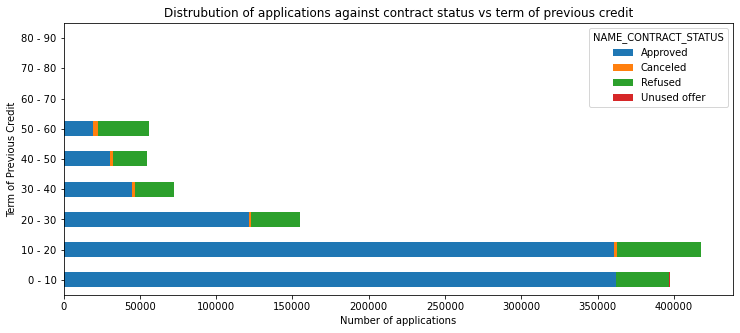

In [134]:
#We see an interesting insight here when analyzing the term of previous credit against the contract statuses in previous application datatset
ax = pd.crosstab(prev["CNT_PAYMENT_BINNED"],prev["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(12,5),stacked=True)
plt.ylabel("Term of Previous Credit")
plt.xlabel('Number of applications')
plt.title('Distrubution of applications against contract status vs term of previous credit')
plt.show()

In [135]:
#We try to cross-reference this column against the application dataset to see how these approved loans are performing

In [136]:
newapprovals=prev[(prev['NAME_CONTRACT_STATUS']=='Approved')][['SK_ID_CURR','CNT_PAYMENT_BINNED']]

In [137]:
newapprovals.head()

,SK_ID_CURR,CNT_PAYMENT_BINNED
0,271877,10 - 20
1,108129,30 - 40
2,122040,10 - 20
3,176158,10 - 20
5,199383,10 - 20


In [138]:
merged_new_approvals = newapprovals.merge(app, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [139]:
#Merging selected data from previous with application data (current)
new_approvals_by_default = merged_new_approvals[['SK_ID_CURR','CNT_PAYMENT_BINNED','TARGET']]

Text(0.5, 1.0, 'Approved applications and their default status vs Term of Previous Credit')

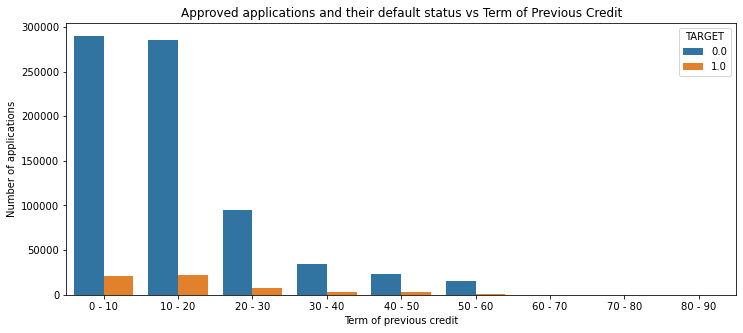

In [140]:
#Now, we see the current status of the approver loans in against the term of previous
plt.figure(figsize=(12,5))
sns.countplot('CNT_PAYMENT_BINNED', hue='TARGET', data=new_approvals_by_default)
plt.xlabel('Term of previous credit')
plt.ylabel('Number of applications')
plt.title('Approved applications and their default status vs Term of Previous Credit')